# Text

|pyplot (sequential) API|OO API|description|
|---|---|---|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

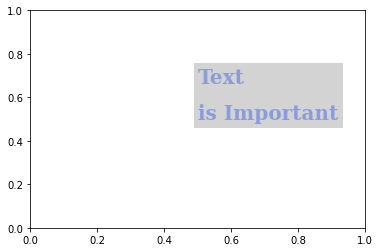

In [14]:
# fontsize, fontweight, fontfamily
# color, linespacing, backgroundcolor, alpha

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=0.5 # transparency
       )

plt.show()

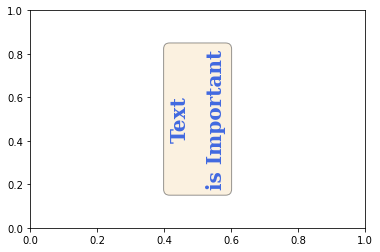

In [20]:
# va: vertical alignment, ha: horizontal alignment, rotation
# bbox - boxstyle, facecolor

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='vertical', # horizontal, vertical
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4)
       )

plt.show()

In [21]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


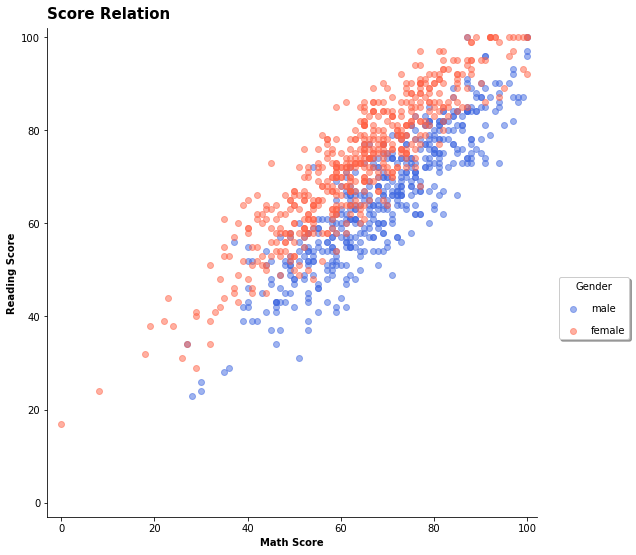

In [30]:
# create student subgroups
# for loop ax.scatter for each subgroups
# legend title, position, anchor

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    # male - royalblue
    # female - tomato
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
#     loc='lower right'
    bbox_to_anchor=[1.2, 0.5]
)

plt.show()

In [37]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

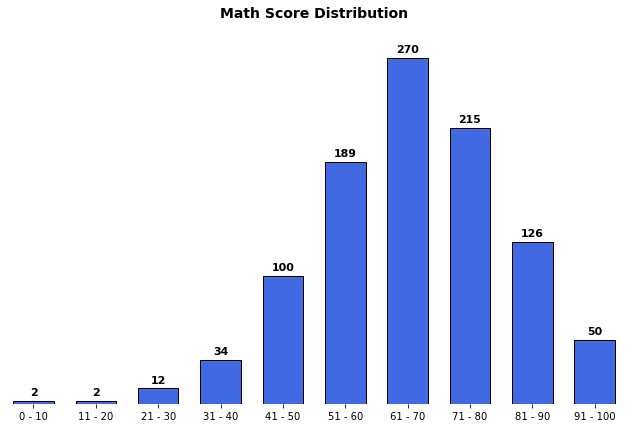

In [38]:
# remove frame, remove yticks
# ax.text(x=idx, y=val+3, s=val)

math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False)
ax.set_yticks([])
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

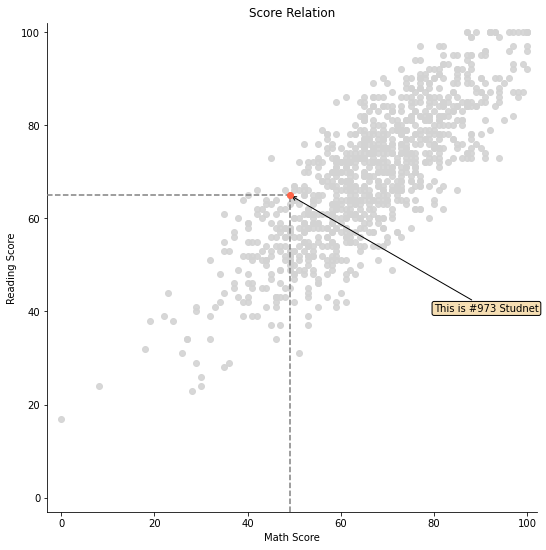

In [59]:
# line parallel to x axis, line parallel to y axis
# bbox style, arrowprops style
# annotate - target coordinate, text coordinate

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = int(np.random.rand(1) * len(student['reading score']))

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Student',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()

# Color

In [ ]:
# hsl: hue, saturation, lightness

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [60]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

student['color'] = student['race/ethnicity'].map(gton)
student['color']

0      1
1      2
2      1
3      0
4      2
      ..
995    4
996    2
997    2
998    3
999    3
Name: color, Length: 1000, dtype: int64

In [65]:
# plt.cm: color map
# tab10: name of a color palette

print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


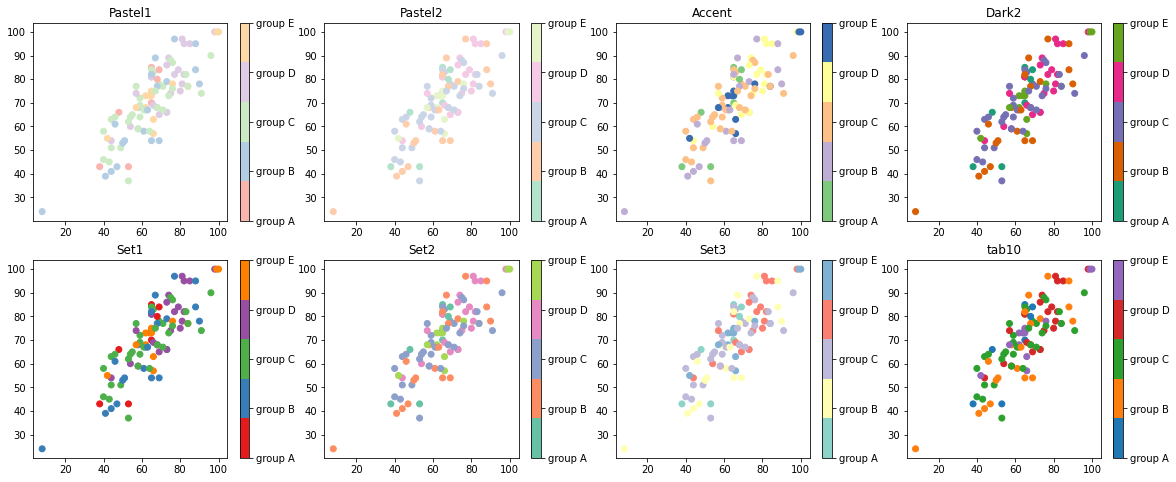

In [68]:
# cmap
# ListedColormap
# cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5])
# fig.colorbar

from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                            c=student_sub['color'], 
                            cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5])
                           )
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

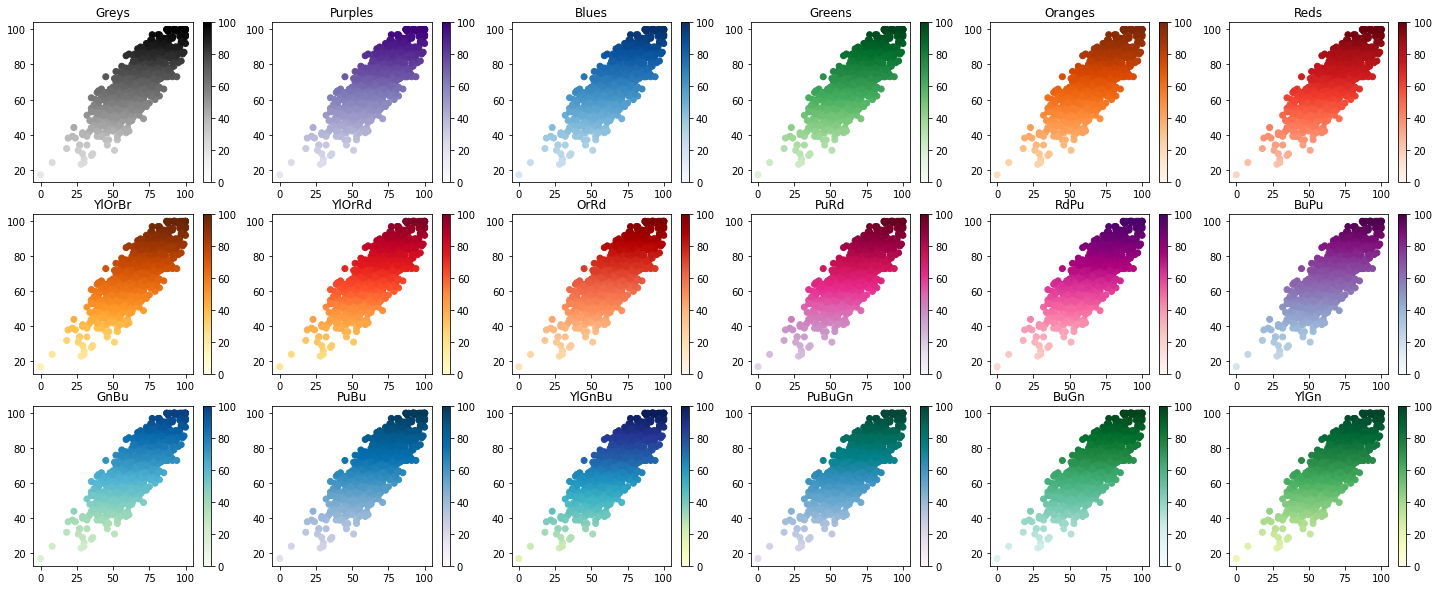

In [72]:
# cmap
# vmin, vmax
# fig.colorbar

sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], 
                            cmap=cm,
                            vmin=0, vmax=100
                           )
    fig.colorbar(pcm, ax=axes[idx])
    axes[idx].set_title(cm)
    
plt.show()

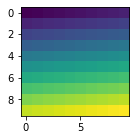

In [79]:
# imshow

im = np.arange(100).reshape(10, 10)
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(im)
plt.show()

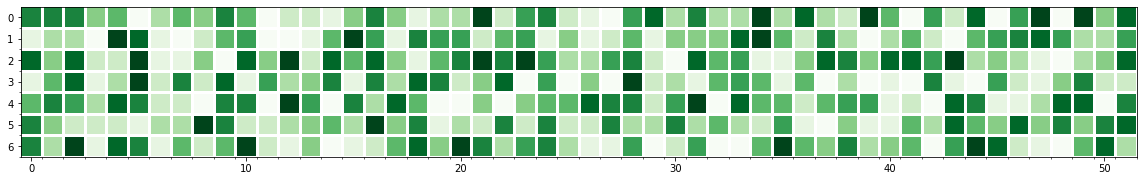

In [76]:
im =  np.random.randint(10, size=(7, 52))

fig, ax = plt.subplots(figsize=(20, 5))

ax.imshow(im, cmap='Greens')
ax.set_yticks(np.arange(7)+0.5, minor=True)
ax.set_xticks(np.arange(52)+0.5, minor=True)
ax.grid(which='minor', color="w", linestyle='-', linewidth=3)

plt.show()

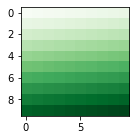

In [80]:
im = np.arange(100).reshape(10, 10)
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(im, cmap='Greens')
plt.show()

In [87]:
a_color, nota_color = 'black', 'lightgray'

# 특정 조건에 따른 column 새로 만드는 방법
colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
colors

0      lightgray
1      lightgray
2      lightgray
3          black
4      lightgray
         ...    
995    lightgray
996    lightgray
997    lightgray
998    lightgray
999    lightgray
Name: race/ethnicity, Length: 1000, dtype: object

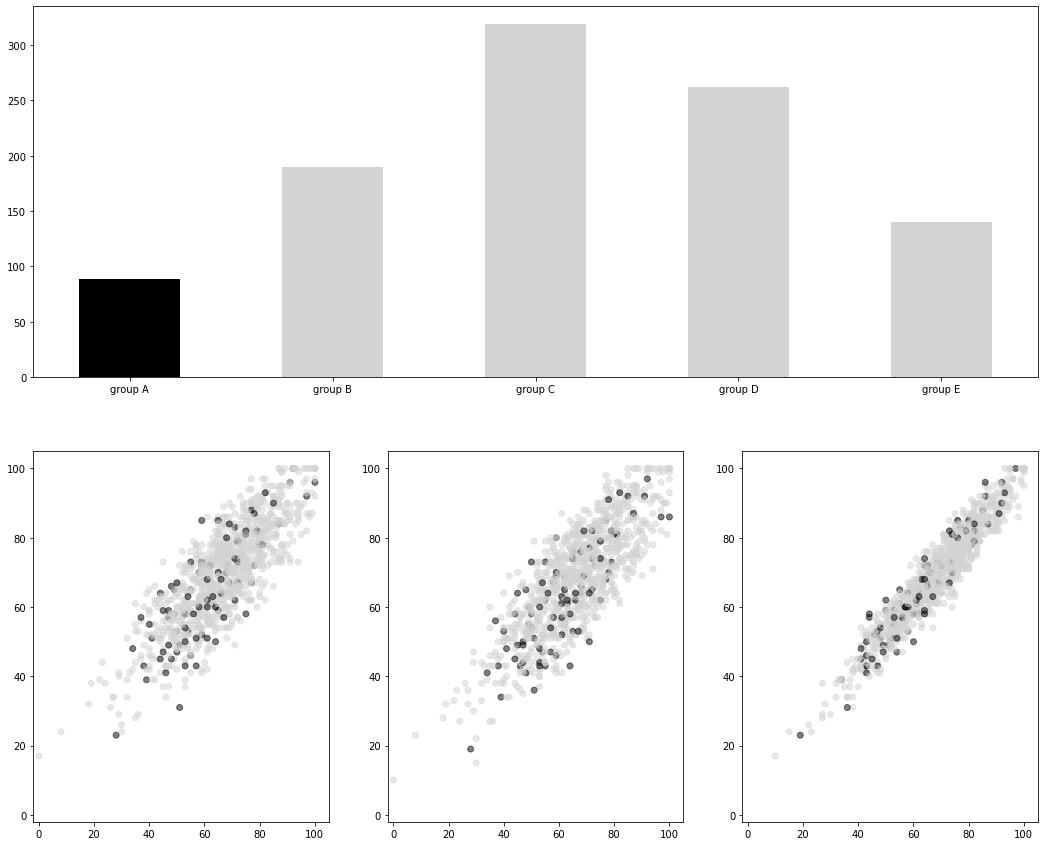

In [83]:
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

# 아래 세 subplot 만드는 방법
ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

# color=colors
ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.5)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.5)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.5)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

# Facet

In [88]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

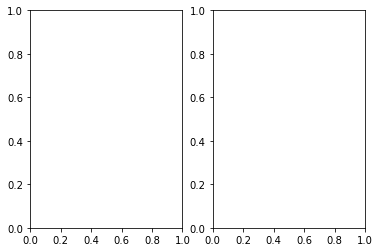

In [89]:
# using add_subplot

fig = plt.figure()
ax = fig.add_subplot(121)
ax = fig.add_subplot(122)
plt.show()

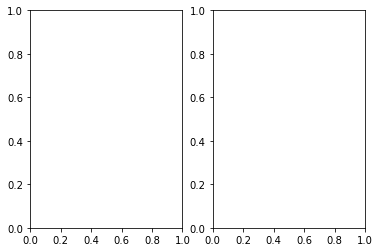

In [92]:
# using subplots

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.show()

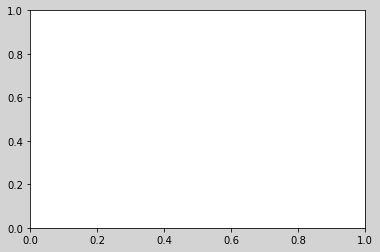

In [93]:
fig, ax = plt.subplots()
fig.set_facecolor('lightgray')
plt.show()

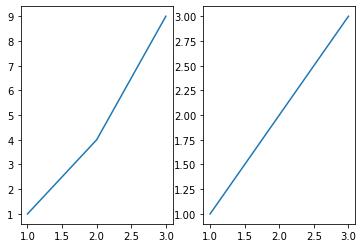

In [94]:
fig = plt.figure() # by default, dpi is 100
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

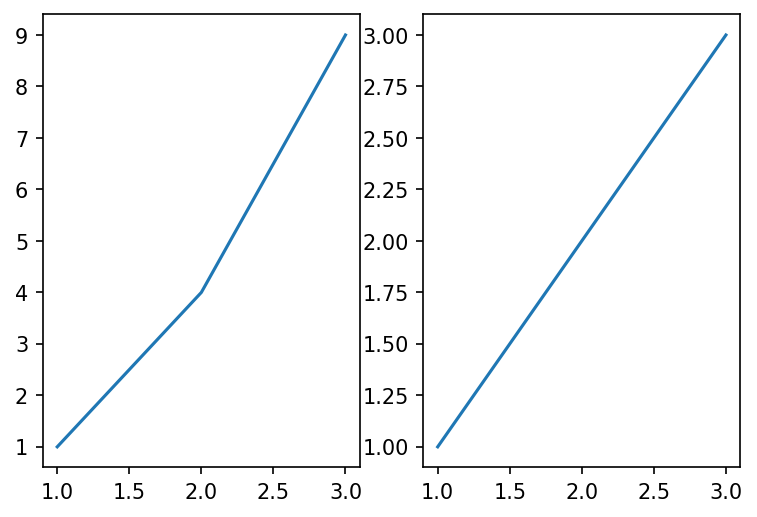

In [98]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

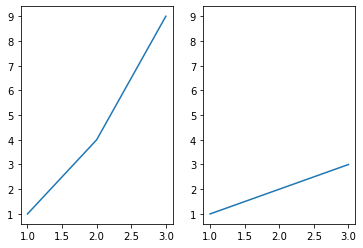

In [99]:
# sharey, sharex

# add_subplot의 경우

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2 = fig.add_subplot(122, sharey=ax1)
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

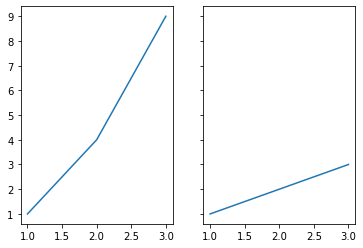

In [100]:
# subplots의 경우

fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].plot([1, 2, 3], [1, 4, 9])
axes[1].plot([1, 2, 3], [1, 2, 3])
plt.show()

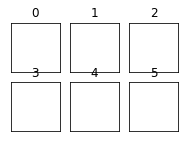

In [103]:
# nested for loop

n, m = 2, 3

fig, axes = plt.subplots(n, m, squeeze=False, figsize=(m, n))

idx = 0
for i in range(n):
    for j in range(m):
        axes[i][j].set_title(idx)
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        idx+=1

plt.show()

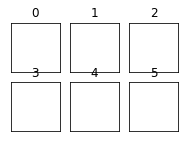

In [104]:
# flatten

n, m = 2, 3

fig, axes = plt.subplots(n, m, figsize=(m, n))

for i, ax in enumerate(axes.flatten()):
    ax.set_title(i)
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

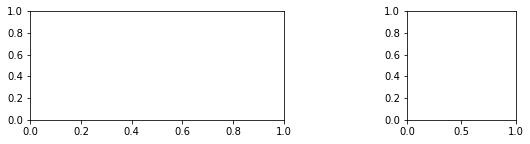

In [110]:
fig = plt.figure(figsize=(10, 2))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, aspect=1)
plt.show()

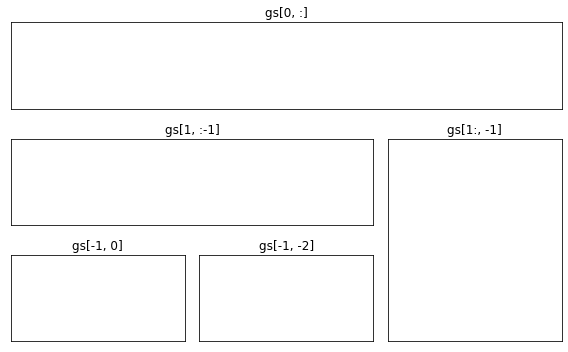

In [115]:
# add_gridspec

fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

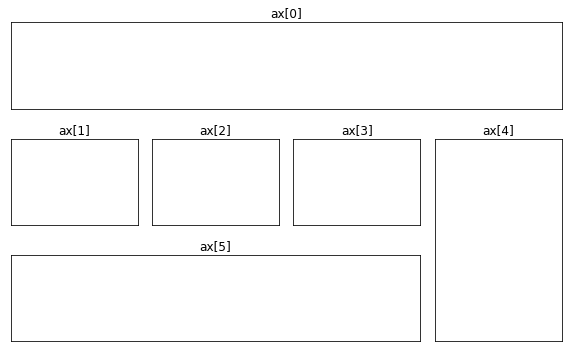

In [117]:
# subplot2grid

fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6): 
    ax[ix].set_title(f'ax[{ix}]')
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    
fig.tight_layout()
plt.show()

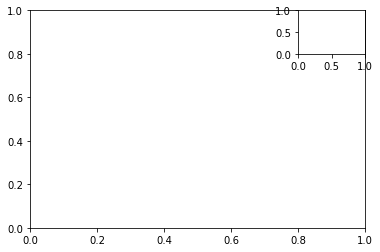

In [118]:
# inset_axes

fig, ax = plt.subplots()
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
plt.show()

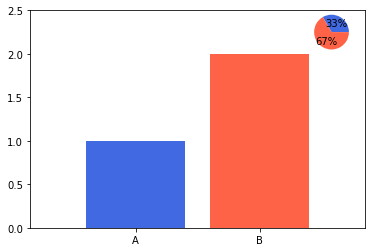

In [122]:
fig, ax = plt.subplots()

color=['royalblue', 'tomato']
ax.bar(['A', 'B'], [1, 2], color=color)

ax.margins(0.25)
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
axin.pie([1, 2], colors=color, autopct='%1.0f%%')
plt.show()

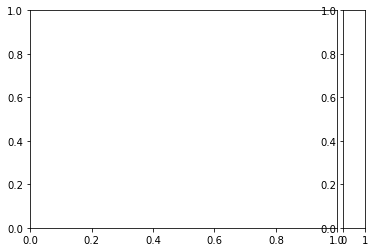

In [125]:
# make_axes_locatable
# colorbar에 사용함

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

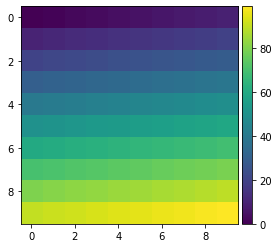

In [126]:
fig, ax = plt.subplots(1, 1)

im = ax.imshow(np.arange(100).reshape((10, 10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(im, cax=cax)
plt.show()

# Misc.

### grids

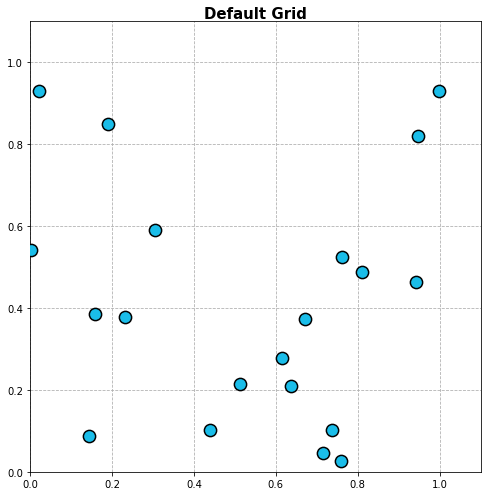

In [130]:
x = np.random.rand(20)
y = np.random.rand(20)

fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150, 
           c='#1ABDE9',
           linewidth=1.5,
           edgecolor='black', zorder=10)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.grid(zorder=0, linestyle='--')    
ax.set_title(f"Default Grid", fontsize=15, va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]


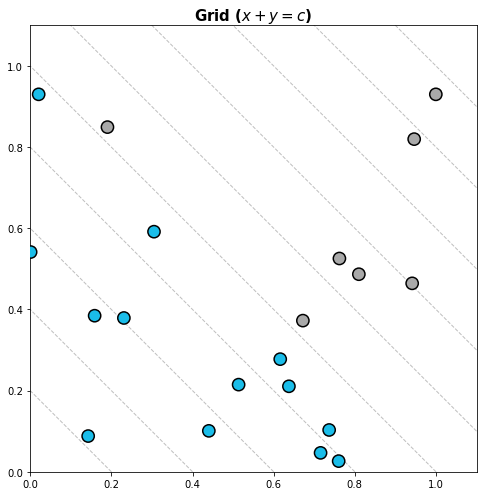

In [133]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if xx+yy < 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

x_start = np.linspace(0, 2.2, 12, endpoint=True)
print(x_start)

for xs in x_start:
    ax.plot([xs, 0], [0, xs], linestyle='--', color='gray', alpha=0.5, linewidth=1)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($x+y=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

[0.         0.15707963 0.31415927 0.4712389  0.62831853 0.78539816
 0.9424778  1.09955743 1.25663706 1.41371669 1.57079633]


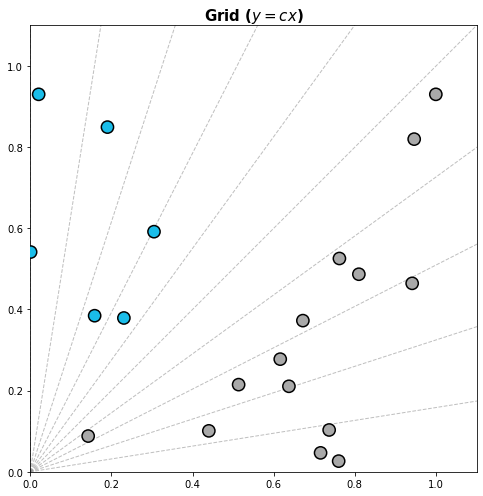

In [136]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if yy/xx >= 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

radian = np.linspace(0, np.pi/2, 11, endpoint=True)
print(radian)

for rad in radian:
    ax.plot([0, 2], [0, 2*np.tan(rad)], linestyle='--', color='gray', alpha=0.5, linewidth=1)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($y=cx$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


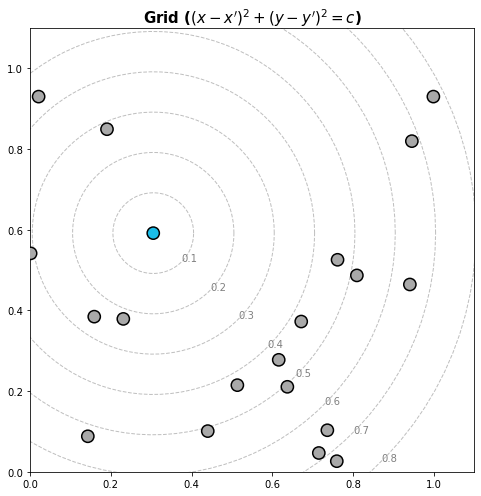

In [138]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150, 
           c=['darkgray' if i!=2 else '#1ABDE9'  for i in range(20)] ,
           linewidth=1.5,
           edgecolor='black', zorder=10)

rs = np.linspace(0.1, 0.8, 8, endpoint=True)
print(rs)

for r in rs:
    xx = r*np.cos(np.linspace(0, 2*np.pi, 100))
    yy = r*np.sin(np.linspace(0, 2*np.pi, 100))
    ax.plot(xx+x[2], yy+y[2], linestyle='--', color='gray', alpha=0.5, linewidth=1)

    ax.text(x[2]+r*np.cos(np.pi/4), y[2]-r*np.sin(np.pi/4), f'{r:.1}', color='gray')

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($(x-x')^2+(y-y')^2=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

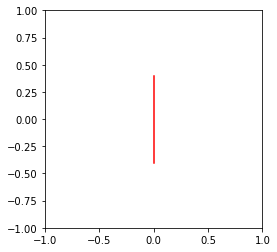

In [139]:
# axvline, axhline

fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvline(0, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

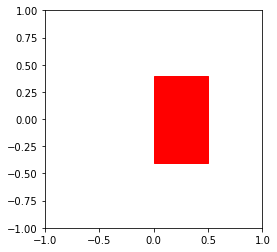

In [140]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvspan(0,0.5, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

### spines

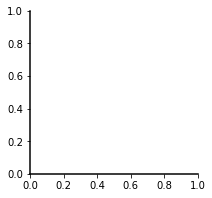

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

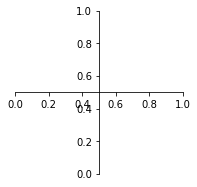

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

plt.show()

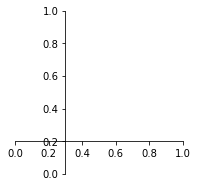

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position(('data', 0.3))
ax.spines['bottom'].set_position(('axes', 0.2))

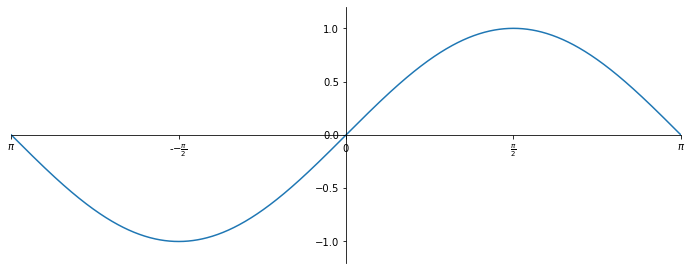

In [157]:
fig = plt.figure(figsize=(12, 9))

ax = fig.add_subplot(aspect=1)

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

ax.plot(x, y)

ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.2, 1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$\pi$', r'-$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'],)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()

### settings

In [158]:
plt.rcParams['figure.dpi'] = 150

# rc: runtime configuration

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


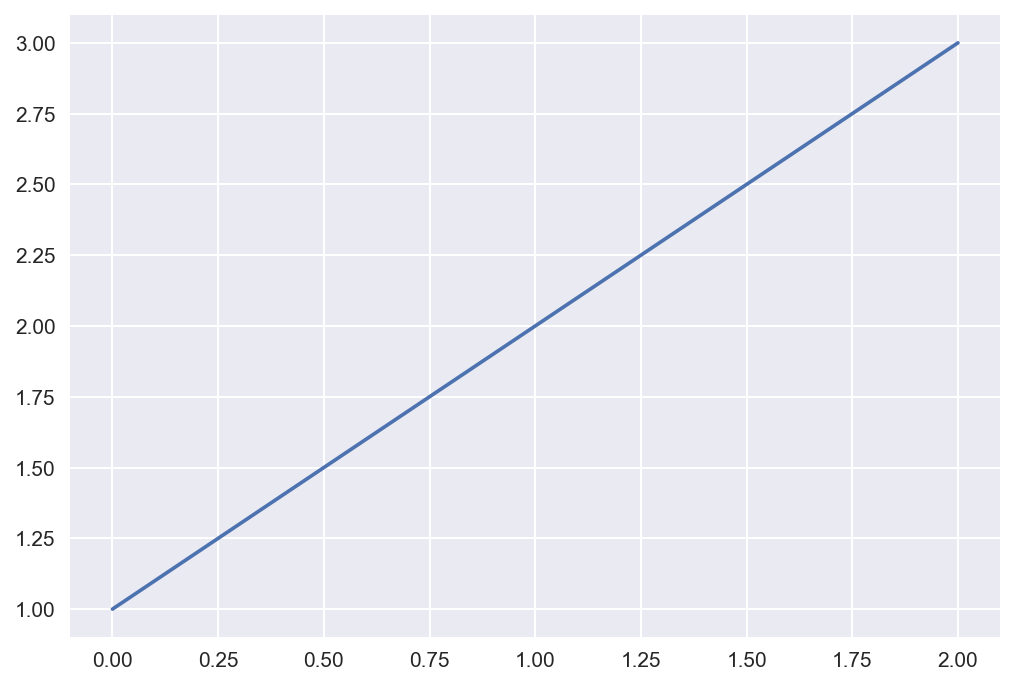

In [160]:
print(mpl.style.available)

mpl.style.use('seaborn')
plt.plot([1, 2, 3])

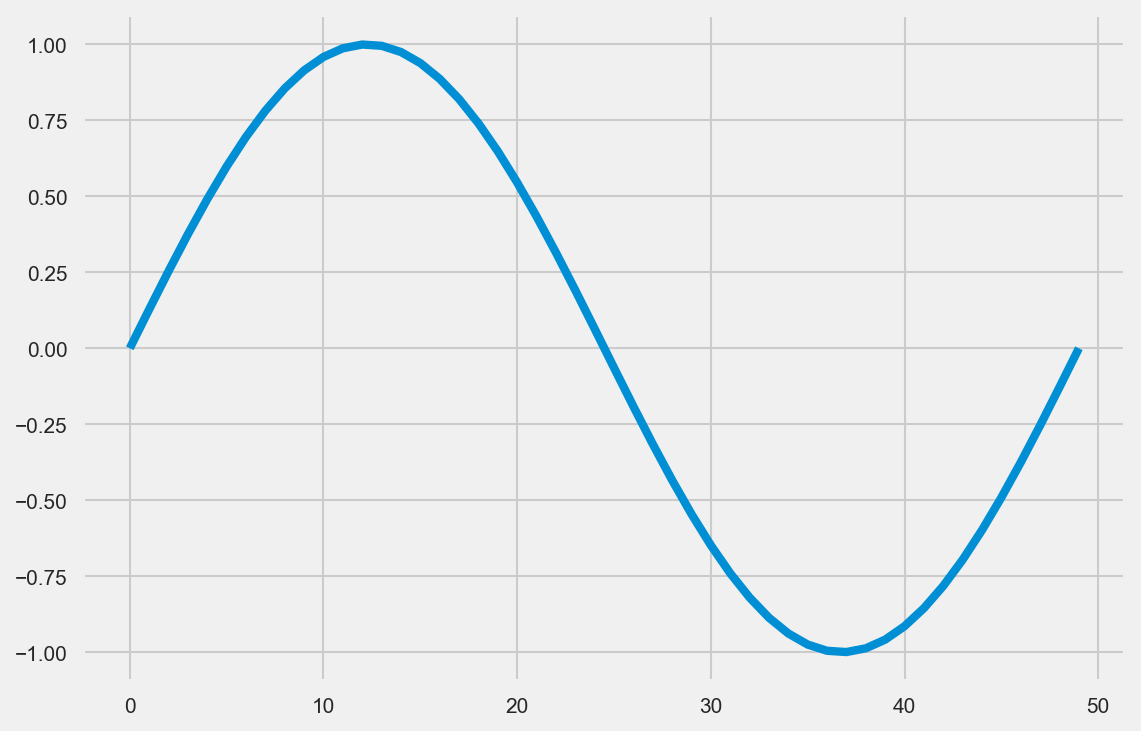

In [161]:
# 한 그래프에 대해서만 스타일 적용

with plt.style.context('fivethirtyeight'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)))
plt.show()